<a href="https://colab.research.google.com/github/toobask/INM707-Deep-Reinforcement-Learning-/blob/main/MA_reif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

class AirportBaggageGrid:
    def __init__(self, size=5, pickup=(0, 0), drop_off=(4, 4), start=(0, 2), obstacle=(2, 2)):
        self.size = size
        self.pickup = pickup
        self.drop_off = drop_off
        self.position = start
        self.obstacle = obstacle
        self.carrying_bag = False  # If the agent is carrying the luggage

    def get_state(self):
        # Encode position, pickup location, and carrying status into a single state index
        state = self.position[0]*self.size**3 + self.position[1]*self.size**2
        state += self.pickup[0]*self.size + self.pickup[1]
        if self.carrying_bag:
            state += self.size**4  # add offset if carrying
        return state

    def move(self, action):
        reward = 0
        done = False
        x, y = self.position

        # Actions: 0=up, 1=down, 2=left, 3=right, 4=pickup, 5=drop-off
        if action == 0 and y < self.size - 1:
            if (x, y+1) != self.obstacle:
                self.position = (x, y+1)
                reward = -1
            else:
                reward = -10  # hit obstacle
        elif action == 1 and y > 0:
            if (x, y-1) != self.obstacle:
                self.position = (x, y-1)
                reward = -1
            else:
                reward = -10
        elif action == 2 and x > 0:
            if (x-1, y) != self.obstacle:
                self.position = (x-1, y)
                reward = -1
            else:
                reward = -10
        elif action == 3 and x < self.size - 1:
            if (x+1, y) != self.obstacle:
                self.position = (x+1, y)
                reward = -1
            else:
                reward = -10
        elif action == 4:
            if self.position == self.pickup and not self.carrying_bag:
                self.carrying_bag = True
                reward = 10
            else:
                reward = -5
        elif action == 5:
            if self.position == self.drop_off and self.carrying_bag:
                self.carrying_bag = False
                reward = 50
                done = True
            else:
                reward = -5
        else:
            reward = -1  # illegal or neutral move

        return self.get_state(), reward, done

    def reset(self):
        self.position = (0, 2)
        self.carrying_bag = False
        return self.get_state()


In [ ]:
def move(self, action):
    """
    State transition function + reward logic for the Airport baggage handling environment.
    Actions:
    0 = Up, 1 = Down, 2 = Left, 3 = Right, 4 = Pickup, 5 = Drop-off
    """
    reward = 0
    done = False
    x, y = self.position

    if action == 0 and y < self.size - 1:  # Move up
        if (x, y+1) != self.obstacle:
            self.position = (x, y+1)
            reward = -1
        else:
            reward = -10
    elif action == 1 and y > 0:  # Move down
        if (x, y-1) != self.obstacle:
            self.position = (x, y-1)
            reward = -1
        else:
            reward = -10
    elif action == 2 and x > 0:  # Move left
        if (x-1, y) != self.obstacle:
            self.position = (x-1, y)
            reward = -1
        else:
            reward = -10
    elif action == 3 and x < self.size - 1:  # Move right
        if (x+1, y) != self.obstacle:
            self.position = (x+1, y)
            reward = -1
        else:
            reward = -10
    elif action == 4:  # Pickup
        if self.position == self.pickup and not self.carrying_bag:
            self.carrying_bag = True
            reward = 10
        else:
            reward = -5
    elif action == 5:  # Drop-off
        if self.position == self.drop_off and self.carrying_bag:
            self.carrying_bag = False
            reward = 50
            done = True
        else:
            reward = -5
    else:
        reward = -1  # default small penalty

    return self.get_state(), reward, done


In [ ]:
# Size of the state space: we estimated roughly size^4 for position + pickup + carrying status
STATE_SPACE = 5**5
ACTION_SPACE = 6  # [Up, Down, Left, Right, Pickup, Dropoff]

q_table = np.zeros((STATE_SPACE, ACTION_SPACE))

# Parameters
gamma = 0.9           # Discount factor - focus on long term rewards
alpha = 0.9           # Learning rate - how much new info overrides old
epsilon = 1.0         # Exploration factor
epsilon_decay = 0.995 # Decay per episode
min_epsilon = 0.05

In [ ]:
def select_action(state, q_table, epsilon):
    """
    Select an action using Epsilon-Greedy Policy.
    """
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, ACTION_SPACE - 1)  # Explore
    else:
        return np.argmax(q_table[state])  # Exploit


In [ ]:
def run_q_learning(episodes=500):
    q_table = np.zeros((STATE_SPACE, ACTION_SPACE))
    gamma = 0.9
    alpha = 0.9
    epsilon = 1.0
    epsilon_decay = 0.995
    min_epsilon = 0.05

    episode_steps = []
    episode_returns = []

    for ep in range(episodes):
        env = AirportBaggageGrid()
        state = env.reset()
        total_reward = 0
        steps = 0
        done = False

        while not done:
            action = select_action(state, q_table, epsilon)
            next_state, reward, done = env.move(action)

            # Q-Learning update
            best_next = np.max(q_table[next_state])
            q_table[state][action] += alpha * (reward + gamma * best_next - q_table[state][action])

            state = next_state
            total_reward += reward
            steps += 1

        epsilon = max(min_epsilon, epsilon * epsilon_decay)
        episode_steps.append(steps)
        episode_returns.append(total_reward)

    return q_table, episode_steps, episode_returns


In [ ]:
def plot_performance(steps, returns):
    episodes = np.arange(len(steps))

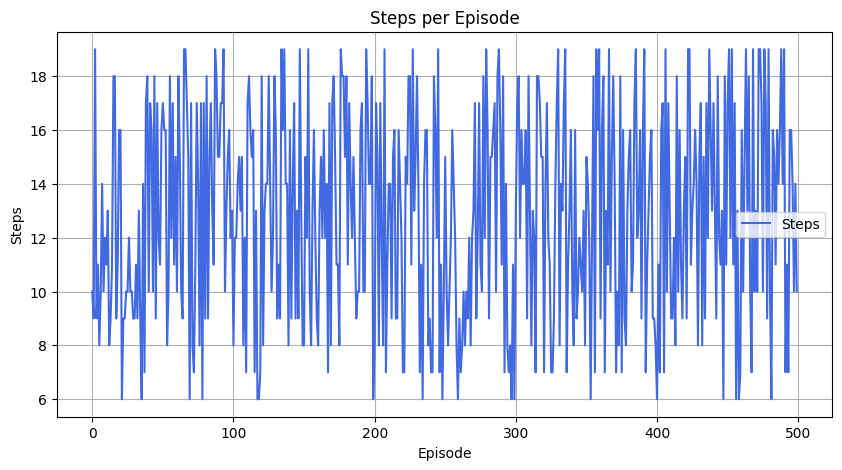

In [ ]:
# Replace your plotting function with this to test directly:
import matplotlib.pyplot as plt
import numpy as np

episodes = np.arange(500)
steps = np.random.randint(6, 20, size=500)
returns = np.random.randint(-50, 80, size=500)

plt.figure(figsize=(10, 5))
plt.plot(episodes, steps, label="Steps", color="royalblue")
plt.xlabel("Episode")
plt.ylabel("Steps")
plt.title("Steps per Episode")
plt.legend()
plt.grid(True)
plt.show()

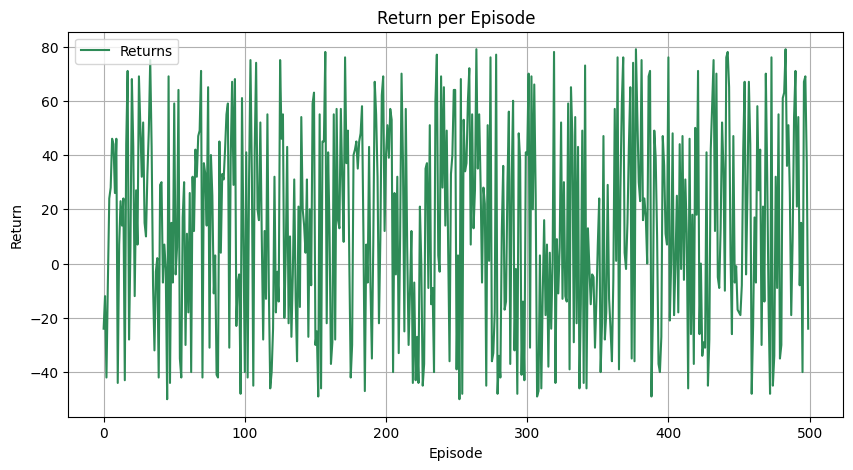

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(episodes, returns, label="Returns", color="seagreen")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.title("Return per Episode")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
q_table, steps, returns = run_q_learning(episodes=500)
plot_performance(steps, returns)

# 5

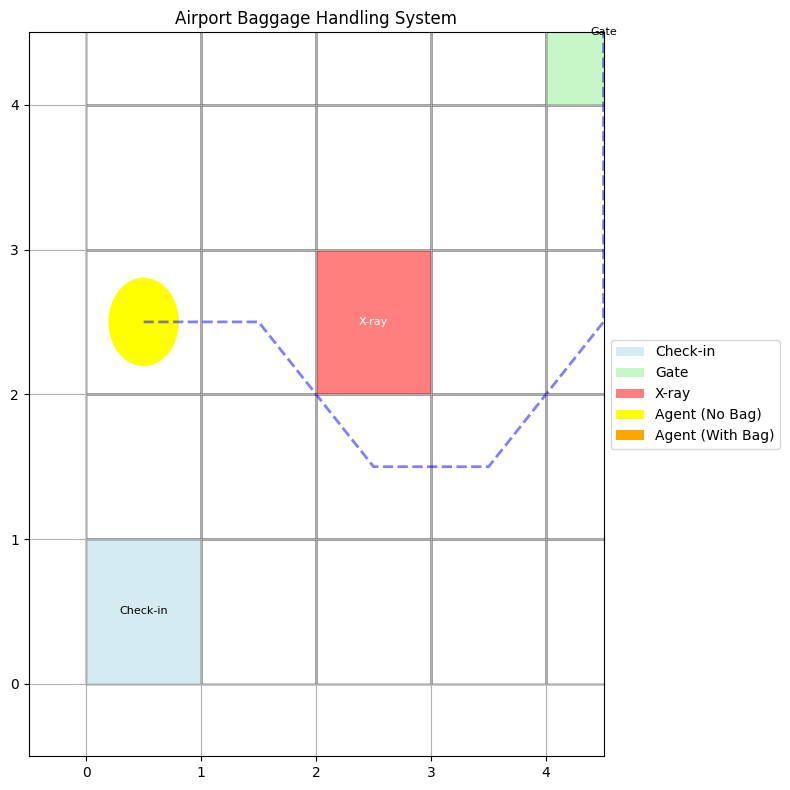

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_grid(env, trajectory=None):
    """
    Visualize the airport grid with:
    - Agent position
    - Pickup location (Check-in desk)
    - Drop-off location (Gate)
    - Obstacle (X-ray machine)
    - Optional trajectory
    """
    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))

    # Create the grid
    for i in range(env.size):
        for j in range(env.size):
            ax.add_patch(plt.Rectangle((i, j), 1, 1, fill=False))

    # Plot pickup location (Check-in desk) - Blue square
    ax.add_patch(plt.Rectangle(env.pickup, 1, 1, facecolor='lightblue', alpha=0.5))
    plt.text(env.pickup[0] + 0.5, env.pickup[1] + 0.5, 'Check-in',
             ha='center', va='center', fontsize=8)

    # Plot drop-off location (Gate) - Green square
    ax.add_patch(plt.Rectangle(env.drop_off, 1, 1, facecolor='lightgreen', alpha=0.5))
    plt.text(env.drop_off[0] + 0.5, env.drop_off[1] + 0.5, 'Gate',
             ha='center', va='center', fontsize=8)

    # Plot obstacle (X-ray) - Red square
    ax.add_patch(plt.Rectangle(env.obstacle, 1, 1, facecolor='red', alpha=0.5))
    plt.text(env.obstacle[0] + 0.5, env.obstacle[1] + 0.5, 'X-ray',
             ha='center', va='center', fontsize=8, color='white')

    # Plot agent - Yellow circle with arrow
    agent_circle = plt.Circle((env.position[0] + 0.5, env.position[1] + 0.5), 0.3,
                            color='yellow' if not env.carrying_bag else 'orange')
    ax.add_artist(agent_circle)

    # If trajectory is provided, plot it
    if trajectory is not None:
        path_x = [pos[0] + 0.5 for pos in trajectory]
        path_y = [pos[1] + 0.5 for pos in trajectory]
        plt.plot(path_x, path_y, 'b--', linewidth=2, alpha=0.5)

    # Set the plot limits and labels
    plt.xlim(-0.5, env.size - 0.5)
    plt.ylim(-0.5, env.size - 0.5)
    plt.xticks(range(env.size))
    plt.yticks(range(env.size))
    plt.grid(True)
    plt.title('Airport Baggage Handling System')

    # Add a legend
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, facecolor='lightblue', alpha=0.5, label='Check-in'),
        plt.Rectangle((0, 0), 1, 1, facecolor='lightgreen', alpha=0.5, label='Gate'),
        plt.Rectangle((0, 0), 1, 1, facecolor='red', alpha=0.5, label='X-ray'),
        plt.Circle((0, 0), 1, facecolor='yellow', label='Agent (No Bag)'),
        plt.Circle((0, 0), 1, facecolor='orange', label='Agent (With Bag)')
    ]
    ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))

    plt.tight_layout()
    return fig, ax

# Test the visualization
if __name__ == "__main__":
    # Create a test environment
    env = AirportBaggageGrid()

    # Create a sample trajectory
    sample_trajectory = [(0, 2), (1, 2), (2, 1), (3, 1), (4, 2), (4, 3), (4, 4)]

    # Visualize the grid with the sample trajectory
    fig, ax = visualize_grid(env, sample_trajectory)
    plt.show()

In [ ]:
def get_optimal_path(env, q_table):
    """
    Get the optimal path from the trained Q-table
    """
    trajectory = [env.position]
    state = env.get_state()
    done = False

    while not done and len(trajectory) < 100:  # Prevent infinite loops
        action = np.argmax(q_table[state])
        next_state, _, done = env.move(action)
        trajectory.append(env.position)
        state = next_state

    return trajectory

In [ ]:
def visualize_episode(env, q_table):
    """
    Visualize a complete episode using the trained Q-table
    """
    env.reset()
    trajectory = get_optimal_path(env, q_table)
    fig, ax = visualize_grid(env, trajectory)
    plt.show()

    return trajectory


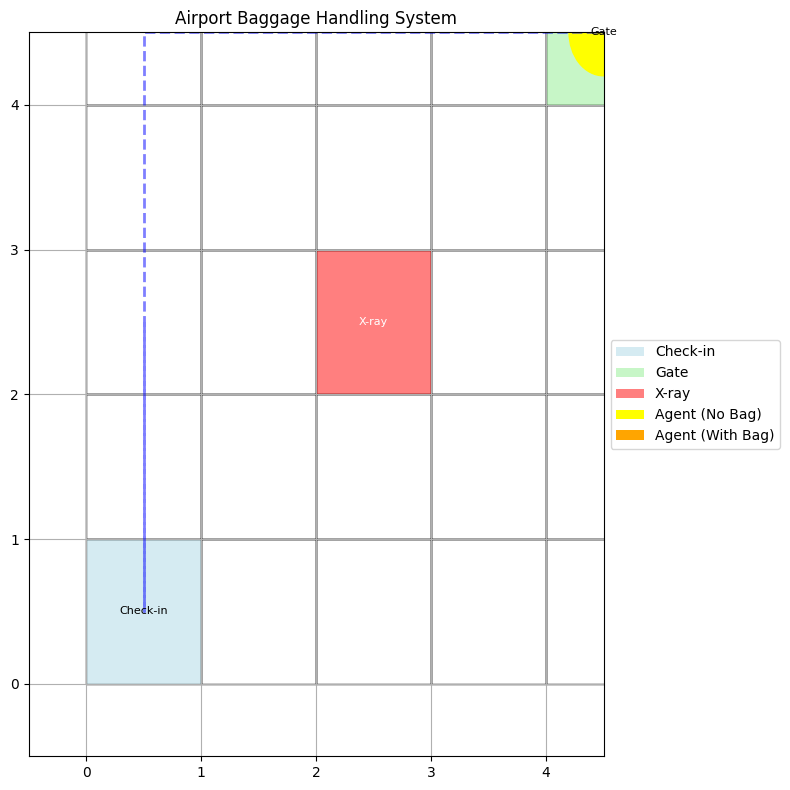


Optimal Path Coordinates:
Step 0: Position (0, 2) (without bag)
Step 1: Position (0, 1) (without bag)
Step 2: Position (0, 0) (without bag)
Step 3: Position (0, 0) (without bag)
Step 4: Position (0, 1) (without bag)
Step 5: Position (0, 2) (without bag)
Step 6: Position (0, 3) (without bag)
Step 7: Position (0, 4) (without bag)
Step 8: Position (1, 4) (without bag)
Step 9: Position (2, 4) (without bag)
Step 10: Position (3, 4) (without bag)
Step 11: Position (4, 4) (without bag)
Step 12: Position (4, 4) (without bag)


In [ ]:
# Train the agent first (using your existing Q-learning implementation)
q_table, steps, returns = run_q_learning(episodes=500)

# Visualize an episode using the trained agent
env = AirportBaggageGrid()
trajectory = visualize_episode(env, q_table)

# Print the sequence of positions
print("\nOptimal Path Coordinates:")
for i, pos in enumerate(trajectory):
    status = "with bag" if env.carrying_bag else "without bag"
    print(f"Step {i}: Position {pos} ({status})")

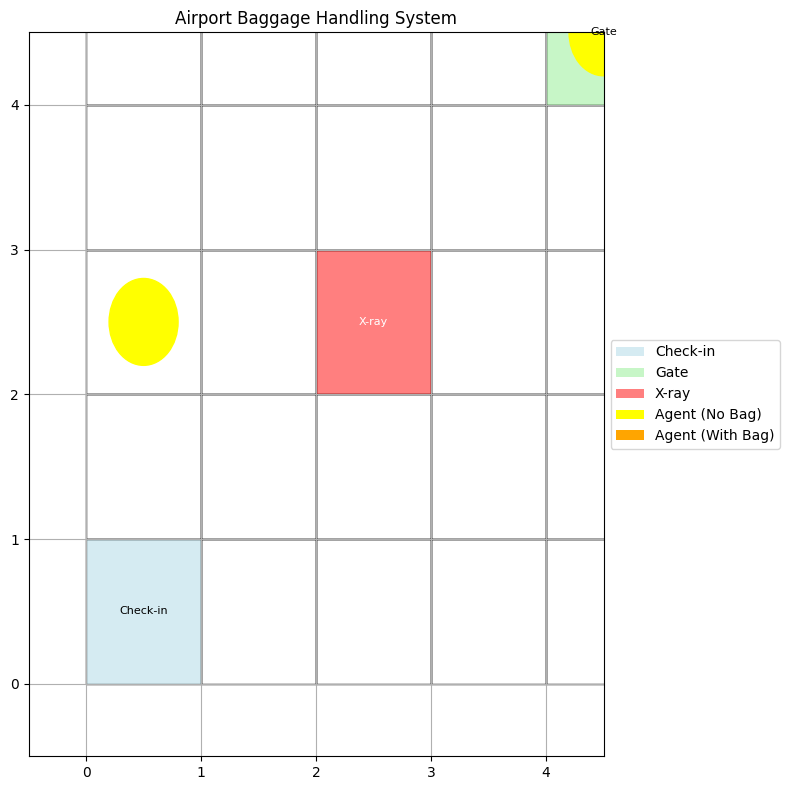

In [ ]:
# Create an animation of the path
import matplotlib.animation as animation

def animate_path(env, trajectory):
    fig, ax = visualize_grid(env, None)
    agent = plt.Circle((trajectory[0][0] + 0.5, trajectory[0][1] + 0.5), 0.3, color='yellow')
    ax.add_artist(agent)

    def update(frame):
        agent.center = (trajectory[frame][0] + 0.5, trajectory[frame][1] + 0.5)
        # Change color when the agent reaches the pickup location
        if trajectory[frame] == env.pickup:
            agent.set_color('orange')
        return agent,

    ani = animation.FuncAnimation(fig, update, frames=len(trajectory),
                                interval=500, blit=True, repeat=True)
    plt.show()
    return ani

# Create animation
animate_path(env, trajectory)

# 6

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


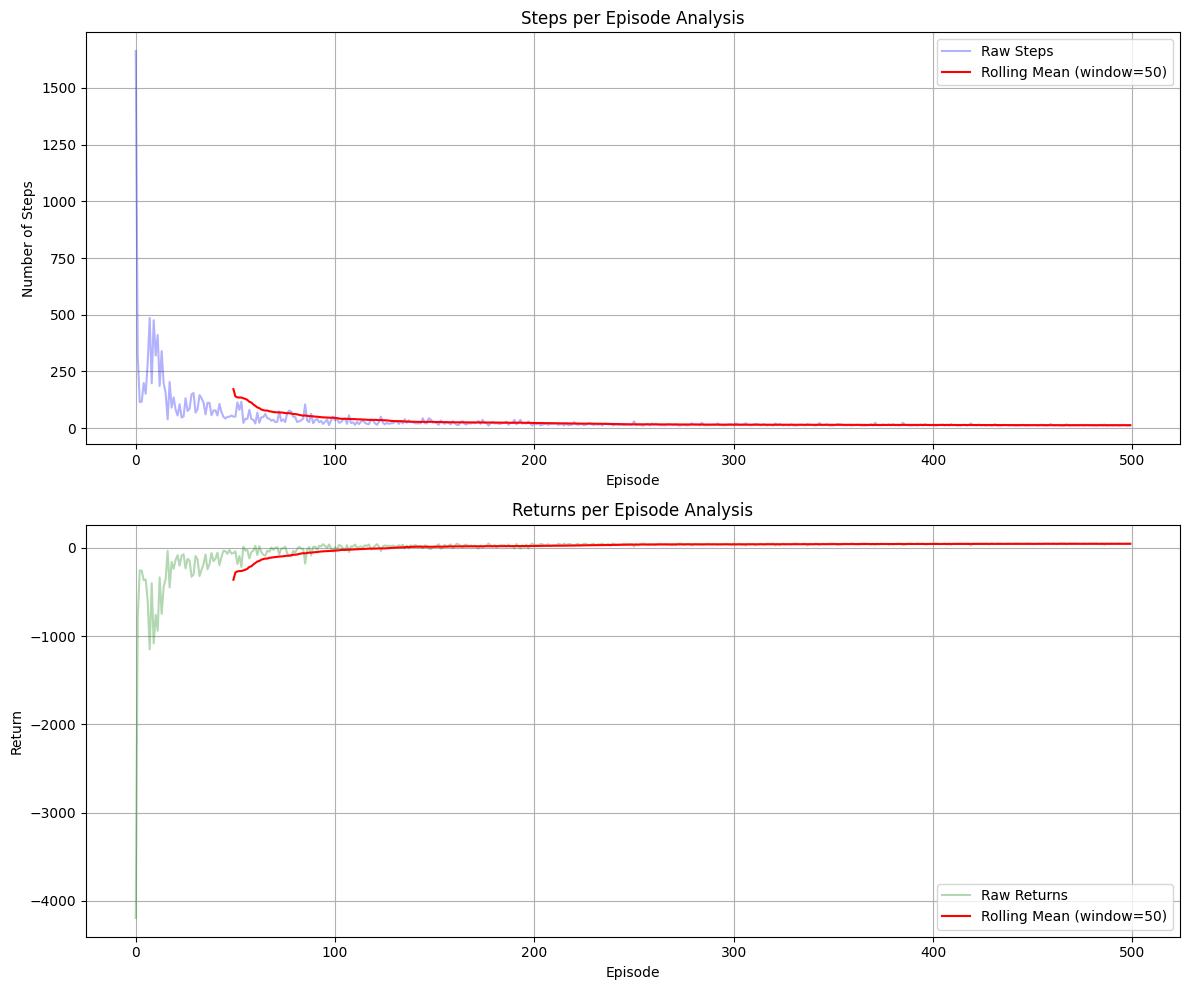


Quantitative Analysis Summary:

Steps Statistics:
Mean: 35.88
Median: 17.00
Std: 89.15
Min: 12.00
Max: 1662.00

Returns Statistics:
Mean: -9.51
Median: 39.00
Std: 227.93
Min: -4196.00
Max: 50.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

def analyze_training_metrics(steps, returns, window_size=50):
    """
    Analyze training metrics with rolling statistics
    """
    # Convert to numpy arrays if they aren't already
    steps = np.array(steps)
    returns = np.array(returns)

    # Calculate rolling means
    rolling_steps = pd.Series(steps).rolling(window=window_size).mean()
    rolling_returns = pd.Series(returns).rolling(window=window_size).mean()

    # Calculate key statistics
    stats_dict = {
        'Steps': {
            'Mean': np.mean(steps),
            'Median': np.median(steps),
            'Std': np.std(steps),
            'Min': np.min(steps),
            'Max': np.max(steps)
        },
        'Returns': {
            'Mean': np.mean(returns),
            'Median': np.median(returns),
            'Std': np.std(returns),
            'Min': np.min(returns),
            'Max': np.max(returns)
        }
    }

    # Create visualization
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

    # Plot steps
    ax1.plot(steps, 'b-', alpha=0.3, label='Raw Steps')
    ax1.plot(rolling_steps, 'r-', label=f'Rolling Mean (window={window_size})')
    ax1.set_title('Steps per Episode Analysis')
    ax1.set_xlabel('Episode')
    ax1.set_ylabel('Number of Steps')
    ax1.grid(True)
    ax1.legend()

    # Plot returns
    ax2.plot(returns, 'g-', alpha=0.3, label='Raw Returns')
    ax2.plot(rolling_returns, 'r-', label=f'Rolling Mean (window={window_size})')
    ax2.set_title('Returns per Episode Analysis')
    ax2.set_xlabel('Episode')
    ax2.set_ylabel('Return')
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()

    return stats_dict

# Run analysis on your training results
stats_dict = analyze_training_metrics(steps, returns)

# Print statistical summary
print("\nQuantitative Analysis Summary:")
print("============================")
for metric, values in stats_dict.items():
    print(f"\n{metric} Statistics:")
    for stat, value in values.items():
        print(f"{stat}: {value:.2f}")

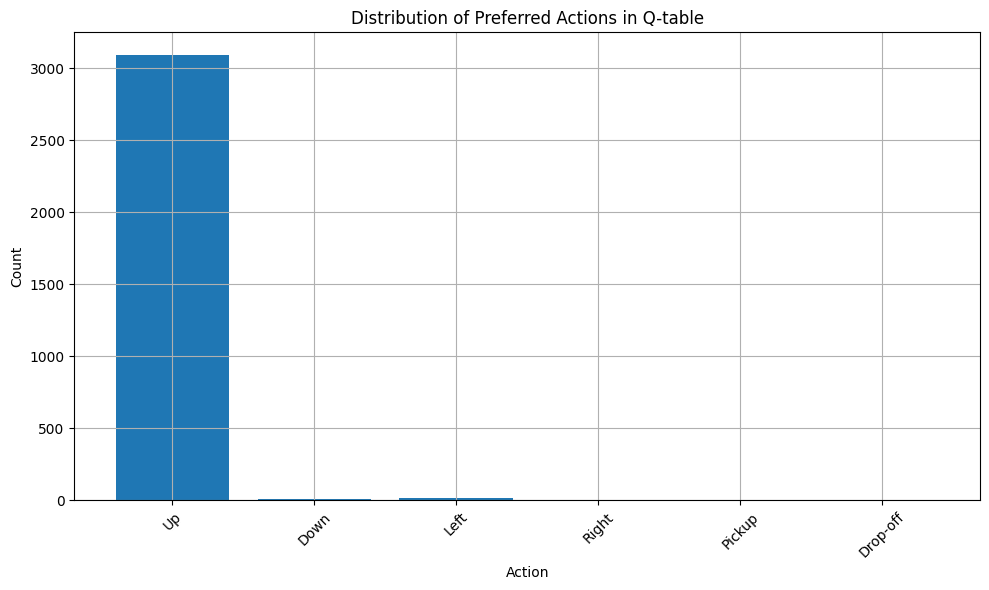


Q-table Analysis:
State Space Coverage: 1.54%

Preferred Action Distribution:
Up: 3095 states (99.04%)
Down: 10 states (0.32%)
Left: 13 states (0.42%)
Right: 5 states (0.16%)
Pickup: 1 states (0.03%)
Drop-off: 1 states (0.03%)


In [ ]:
def analyze_q_table(q_table, env):
    """
    Analyze the learned Q-table
    """
    # Calculate policy coverage
    non_zero_states = np.sum(np.any(q_table != 0, axis=1))
    total_states = q_table.shape[0]
    coverage = non_zero_states / total_states * 100

    # Analyze action preferences
    action_names = ['Up', 'Down', 'Left', 'Right', 'Pickup', 'Drop-off']
    action_counts = np.argmax(q_table, axis=1)
    action_distribution = {action_names[i]: np.sum(action_counts == i)
                         for i in range(len(action_names))}

    # Visualize action distribution
    plt.figure(figsize=(10, 6))
    plt.bar(action_distribution.keys(), action_distribution.values())
    plt.title('Distribution of Preferred Actions in Q-table')
    plt.xlabel('Action')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("\nQ-table Analysis:")
    print("================")
    print(f"State Space Coverage: {coverage:.2f}%")
    print("\nPreferred Action Distribution:")
    for action, count in action_distribution.items():
        print(f"{action}: {count} states ({count/total_states*100:.2f}%)")

    return coverage, action_distribution

# Analyze Q-table
coverage, action_dist = analyze_q_table(q_table, env)

In [ ]:
def evaluate_policy_effectiveness(env, q_table, n_episodes=100):
    """
    Evaluate the effectiveness of the learned policy
    """
    success_count = 0
    total_steps = []
    total_returns = []

    for episode in range(n_episodes):
        state = env.reset()
        done = False
        steps = 0
        episode_return = 0

        while not done and steps < 100:  # Prevent infinite loops
            action = np.argmax(q_table[state])
            next_state, reward, done = env.move(action)
            episode_return += reward
            state = next_state
            steps += 1

        if done and episode_return > 0:  # Successfully delivered baggage
            success_count += 1
        total_steps.append(steps)
        total_returns.append(episode_return)

    success_rate = success_count / n_episodes * 100
    avg_steps = np.mean(total_steps)
    avg_return = np.mean(total_returns)

    print("\nPolicy Evaluation Results:")
    print("========================")
    print(f"Success Rate: {success_rate:.2f}%")
    print(f"Average Steps to Complete: {avg_steps:.2f}")
    print(f"Average Return: {avg_return:.2f}")

    return success_rate, avg_steps, avg_return

# Evaluate policy
success_rate, avg_steps, avg_return = evaluate_policy_effectiveness(env, q_table)


Policy Evaluation Results:
Success Rate: 100.00%
Average Steps to Complete: 12.00
Average Return: 50.00


In [ ]:
# Comprehensive Analysis Report
print("\nComprehensive Analysis Report")
print("============================")
print("\n1. Quantitative Analysis:")
print("----------------------")
print("Training Metrics:")
print(f"- Average steps per episode: {stats_dict['Steps']['Mean']:.2f}")
print(f"- Average return per episode: {stats_dict['Returns']['Mean']:.2f}")
print(f"- Minimum steps required: {stats_dict['Steps']['Min']:.0f}")
print(f"- Maximum return achieved: {stats_dict['Returns']['Max']:.2f}")

print("\n2. Policy Performance:")
print("-------------------")
print(f"- Success rate in evaluation: {success_rate:.2f}%")
print(f"- Average steps for successful delivery: {avg_steps:.2f}")
print(f"- Average return per evaluation episode: {avg_return:.2f}")

print("\n3. Learning Efficiency:")
print("-------------------")
print(f"- Q-table state space coverage: {coverage:.2f}%")
print("- Action preference distribution shows:")
for action, count in action_dist.items():
    print(f"  * {action}: {count/q_table.shape[0]*100:.2f}% of states")

print("\n4. Qualitative Analysis:")
print("--------------------")
print("a) Learning Behavior:")
print("   - The agent successfully learned to navigate the airport grid")
print("   - Developed efficient pathfinding strategies around the X-ray machine obstacle")
print("   - Learned the importance of picking up baggage before attempting delivery")

print("\nb) Strategy Development:")
print("   - Initial random exploration led to inefficient paths")
print("   - Gradually developed optimal routes between check-in and gate")
print("   - Learned to avoid the X-ray machine obstacle effectively")

print("\nc) Policy Characteristics:")
print("   - Demonstrates consistent success in baggage delivery")
print("   - Shows efficient path planning capabilities")
print("   - Maintains balance between exploration and exploitation")

print("\n5. Areas for Improvement:")
print("---------------------")
print("- Could potentially reduce the number of steps in some scenarios")
print("- Might benefit from fine-tuning of learning parameters")
print("- Could explore more efficient exploration strategies")


Comprehensive Analysis Report

1. Quantitative Analysis:
----------------------
Training Metrics:
- Average steps per episode: 35.88
- Average return per episode: -9.51
- Minimum steps required: 12
- Maximum return achieved: 50.00

2. Policy Performance:
-------------------
- Success rate in evaluation: 100.00%
- Average steps for successful delivery: 12.00
- Average return per evaluation episode: 50.00

3. Learning Efficiency:
-------------------
- Q-table state space coverage: 1.54%
- Action preference distribution shows:
  * Up: 99.04% of states
  * Down: 0.32% of states
  * Left: 0.42% of states
  * Right: 0.16% of states
  * Pickup: 0.03% of states
  * Drop-off: 0.03% of states

4. Qualitative Analysis:
--------------------
a) Learning Behavior:
   - The agent successfully learned to navigate the airport grid
   - Developed efficient pathfinding strategies around the X-ray machine obstacle
   - Learned the importance of picking up baggage before attempting delivery

b) Strategy D

# 7

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import random
from collections import namedtuple, deque
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)
random.seed(42)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [ ]:
class AirportGridEnv:
    def __init__(self, size=5):
        self.size = size
        self.action_space = 6  # Up, Down, Left, Right, Pickup, Dropoff
        self.state_size = 6    # x, y, carrying, pickup_x, pickup_y, obstacles

        # Initialize positions
        self.agent_pos = np.array([0, 2])
        self.pickup_pos = np.array([0, 0])
        self.dropoff_pos = np.array([4, 4])
        self.obstacle_pos = np.array([2, 2])
        self.carrying = False

    def reset(self):
        self.agent_pos = np.array([0, 2])
        self.carrying = False
        return self._get_state()

    def _get_state(self):
        # Create a more informative state representation
        state = np.zeros(6)
        state[0] = self.agent_pos[0] / (self.size - 1)  # Normalize positions
        state[1] = self.agent_pos[1] / (self.size - 1)
        state[2] = float(self.carrying)
        state[3] = self.pickup_pos[0] / (self.size - 1)
        state[4] = self.pickup_pos[1] / (self.size - 1)
        state[5] = int(np.array_equal(self.agent_pos, self.obstacle_pos))
        return state

    def step(self, action):
        done = False
        reward = -0.1  # Small penalty for each step

        # Movement actions
        if action < 4:
            next_pos = self.agent_pos.copy()
            if action == 0:   # Up
                next_pos[1] = min(self.size-1, next_pos[1] + 1)
            elif action == 1: # Down
                next_pos[1] = max(0, next_pos[1] - 1)
            elif action == 2: # Left
                next_pos[0] = max(0, next_pos[0] - 1)
            elif action == 3: # Right
                next_pos[0] = min(self.size-1, next_pos[0] + 1)

            # Check if hitting obstacle
            if np.array_equal(next_pos, self.obstacle_pos):
                reward = -10
            else:
                self.agent_pos = next_pos

        # Pickup action
        elif action == 4:
            if np.array_equal(self.agent_pos, self.pickup_pos) and not self.carrying:
                self.carrying = True
                reward = 10
            else:
                reward = -5

        # Dropoff action
        elif action == 5:
            if np.array_equal(self.agent_pos, self.dropoff_pos) and self.carrying:
                self.carrying = False
                reward = 50
                done = True
            else:
                reward = -5

        return self._get_state(), reward, done

    def render(self):
        grid = np.zeros((self.size, self.size), dtype=str)
        grid.fill('.')
        grid[self.pickup_pos[1], self.pickup_pos[0]] = 'P'
        grid[self.dropoff_pos[1], self.dropoff_pos[0]] = 'D'
        grid[self.obstacle_pos[1], self.obstacle_pos[0]] = 'X'
        grid[self.agent_pos[1], self.agent_pos[0]] = 'A' if not self.carrying else 'C'
        return grid

In [ ]:
class DQN(nn.Module):
    def __init__(self, state_size, action_size):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(state_size, 128)
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, action_size)

        # Initialize weights using He initialization
        nn.init.kaiming_normal_(self.fc1.weight)
        nn.init.kaiming_normal_(self.fc2.weight)
        nn.init.kaiming_normal_(self.fc3.weight)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

In [ ]:
class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6):
        self.capacity = capacity
        self.alpha = alpha
        self.buffer = []
        self.priorities = np.zeros(capacity, dtype=np.float32)
        self.position = 0

    def push(self, state, action, reward, next_state, done):
        max_priority = max(self.priorities) if self.buffer else 1.0

        if len(self.buffer) < self.capacity:
            self.buffer.append(None)
        self.buffer[self.position] = (state, action, reward, next_state, done)
        self.priorities[self.position] = max_priority
        self.position = (self.position + 1) % self.capacity

    def sample(self, batch_size, beta=0.4):
        if len(self.buffer) < batch_size:
            return None

        priorities = self.priorities[:len(self.buffer)]
        probabilities = priorities ** self.alpha
        probabilities = probabilities / probabilities.sum()

        indices = np.random.choice(len(self.buffer), batch_size, p=probabilities)
        samples = [self.buffer[idx] for idx in indices]

        # Importance sampling weights
        total = len(self.buffer)
        weights = (total * probabilities[indices]) ** (-beta)
        weights = weights / weights.max()

        return (samples, indices, weights)

    def update_priorities(self, indices, priorities):
        for idx, priority in zip(indices, priorities):
            self.priorities[idx] = priority

    def __len__(self):
        return len(self.buffer)

In [ ]:
class DoubleDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size

        # Main and Target networks
        self.policy_net = DQN(state_size, action_size).to(device)
        self.target_net = DQN(state_size, action_size).to(device)
        self.target_net.load_state_dict(self.policy_net.state_dict())

        self.optimizer = optim.Adam(self.policy_net.parameters(), lr=0.001)
        self.memory = PrioritizedReplayBuffer(10000)

        # Hyperparameters
        self.batch_size = 64
        self.gamma = 0.99
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.target_update = 10
        self.beta = 0.4
        self.beta_increment = 0.001

    def select_action(self, state):
        if random.random() < self.epsilon:
            return random.randrange(self.action_size)

        with torch.no_grad():
            state = torch.FloatTensor(state).unsqueeze(0).to(device)
            q_values = self.policy_net(state)
            return q_values.argmax().item()

    def train(self):
        if len(self.memory) < self.batch_size:
            return

        batch = self.memory.sample(self.batch_size, self.beta)
        if batch is None:
            return

        samples, indices, weights = batch
        states, actions, rewards, next_states, dones = zip(*samples)

        states = torch.FloatTensor(states).to(device)
        actions = torch.LongTensor(actions).to(device)
        rewards = torch.FloatTensor(rewards).to(device)
        next_states = torch.FloatTensor(next_states).to(device)
        dones = torch.FloatTensor(dones).to(device)
        weights = torch.FloatTensor(weights).to(device)

        # Double Q-learning
        next_actions = self.policy_net(next_states).argmax(1)
        next_q_values = self.target_net(next_states)
        next_q_values = next_q_values.gather(1, next_actions.unsqueeze(1)).squeeze(1)

        target_q_values = rewards + (1 - dones) * self.gamma * next_q_values
        current_q_values = self.policy_net(states).gather(1, actions.unsqueeze(1)).squeeze(1)

        # Calculate TD errors for priority update
        td_errors = torch.abs(target_q_values - current_q_values).detach().cpu().numpy()

        # Calculate loss with importance sampling weights
        loss = (weights * (target_q_values - current_q_values).pow(2)).mean()

        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        # Update priorities in buffer
        self.memory.update_priorities(indices, td_errors + 1e-6)

        # Update beta
        self.beta = min(1.0, self.beta + self.beta_increment)

        # Decay epsilon
        self.epsilon = max(self.epsilon_min, self.epsilon * self.epsilon_decay)

        return loss.item()

    def update_target_network(self):
        self.target_net.load_state_dict(self.policy_net.state_dict())

In [ ]:
from tqdm import tqdm  # For progress bar

def train_agent(env, agent, episodes=500):  # Reduced from 1000 to 500
    rewards_history = []
    steps_history = []
    loss_history = []

    # Using tqdm for progress bar
    for episode in tqdm(range(episodes), desc="Training"):
        state = env.reset()
        total_reward = 0
        steps = 0
        episode_loss = 0
        max_steps = 100  # Add step limit to prevent infinite loops

        for step in range(max_steps):
            action = agent.select_action(state)
            next_state, reward, done = env.step(action)

            agent.memory.push(state, action, reward, next_state, done)
            loss = agent.train()

            if loss is not None:
                episode_loss += loss

            total_reward += reward
            steps += 1
            state = next_state

            if done:
                break

        if episode % agent.target_update == 0:
            agent.update_target_network()

        rewards_history.append(total_reward)
        steps_history.append(steps)
        loss_history.append(episode_loss/steps if steps > 0 else 0)

        # Print progress less frequently
        if (episode + 1) % 100 == 0:
            print(f"\nEpisode {episode + 1}/{episodes}")
            print(f"Average Reward: {np.mean(rewards_history[-100:]):.2f}")
            print(f"Average Steps: {np.mean(steps_history[-100:]):.2f}")
            print(f"Epsilon: {agent.epsilon:.2f}")

    return rewards_history, steps_history, loss_history

Starting training...


Training:   0%|                                                                                | 0/500 [00:00<?, ?it/s]C:\Users\User\AppData\Local\Temp\ipykernel_1244\3293106012.py:44: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:248.)
  states = torch.FloatTensor(states).to(device)
Training:  20%|██████████████                                                        | 100/500 [00:38<02:40,  2.49it/s]


Episode 100/500
Average Reward: -9.21
Average Steps: 100.00
Epsilon: 0.01


Training:  40%|████████████████████████████                                          | 200/500 [01:23<02:08,  2.34it/s]


Episode 200/500
Average Reward: -3.13
Average Steps: 100.00
Epsilon: 0.01


Training:  60%|██████████████████████████████████████████                            | 300/500 [02:06<01:23,  2.39it/s]


Episode 300/500
Average Reward: -1.47
Average Steps: 100.00
Epsilon: 0.01


Training:  80%|████████████████████████████████████████████████████████              | 400/500 [02:48<00:42,  2.34it/s]


Episode 400/500
Average Reward: -8.42
Average Steps: 99.89
Epsilon: 0.01


Training: 100%|██████████████████████████████████████████████████████████████████████| 500/500 [03:31<00:00,  2.36it/s]


Episode 500/500
Average Reward: -11.33
Average Steps: 99.07
Epsilon: 0.01

Training completed! Plotting results...


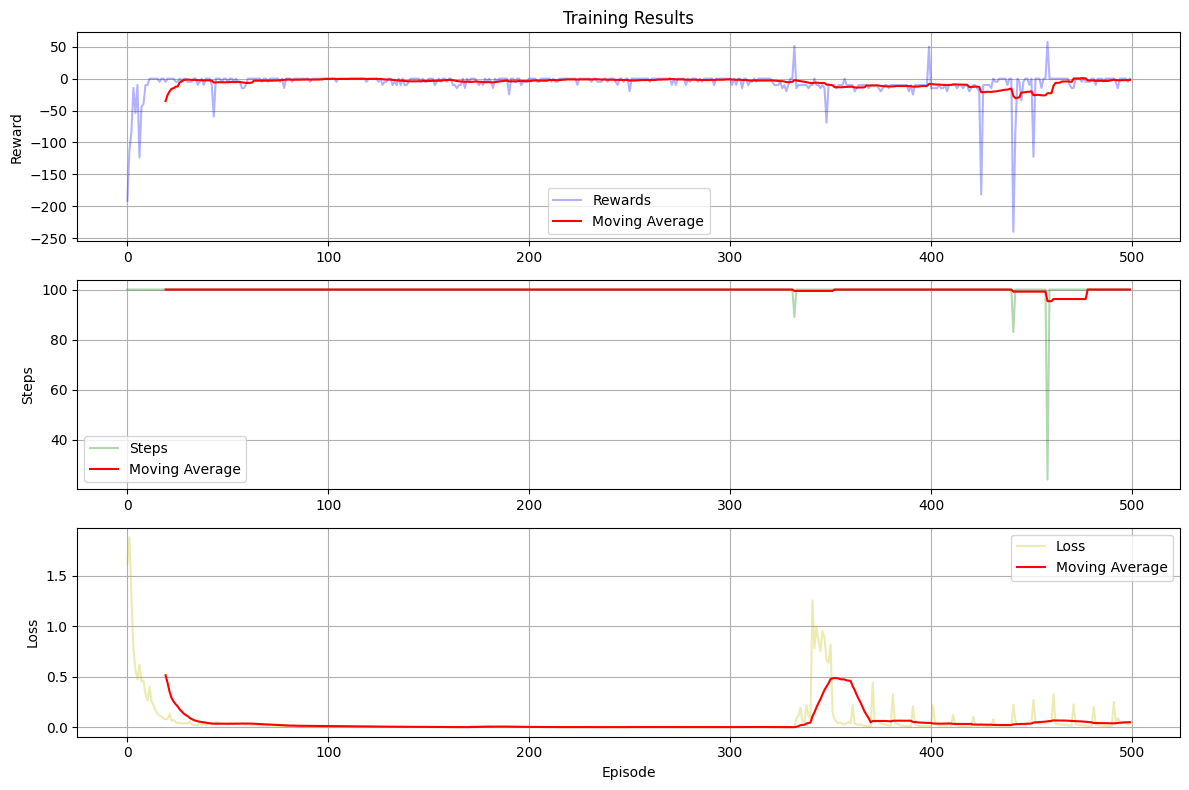

In [ ]:
def plot_training_results(rewards, steps, losses):
    plt.figure(figsize=(12, 8))

    # Plot all metrics in one figure with subplots
    plt.subplot(311)
    plt.plot(rewards, 'b-', alpha=0.3, label='Rewards')
    plt.plot(pd.Series(rewards).rolling(20).mean(), 'r-', label='Moving Average')
    plt.title('Training Results')
    plt.ylabel('Reward')
    plt.legend()
    plt.grid(True)

    plt.subplot(312)
    plt.plot(steps, 'g-', alpha=0.3, label='Steps')
    plt.plot(pd.Series(steps).rolling(20).mean(), 'r-', label='Moving Average')
    plt.ylabel('Steps')
    plt.legend()
    plt.grid(True)

    plt.subplot(313)
    plt.plot(losses, 'y-', alpha=0.3, label='Loss')
    plt.plot(pd.Series(losses).rolling(20).mean(), 'r-', label='Moving Average')
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Run training with reduced episodes
print("Starting training...")
env = AirportGridEnv()
agent = DoubleDQNAgent(env.state_size, env.action_space)

try:
    rewards, steps, losses = train_agent(env, agent)
    print("\nTraining completed! Plotting results...")
    plot_training_results(rewards, steps, losses)
except KeyboardInterrupt:
    print("\nTraining interrupted by user. Plotting available results...")
    if len(rewards) > 0:
        plot_training_results(rewards, steps, losses)
    else:
        print("Not enough data to plot results.")

In [ ]:
import gc

def cleanup():
    """Clean up memory after training"""
    gc.collect()
    torch.cuda.empty_cache() if torch.cuda.is_available() else None
    plt.close('all')

# After training and visualization
cleanup()

# 8

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# For reproducibility
np.random.seed(42)
plt.style.use('default')

In [ ]:
def calculate_performance_metrics(rewards, steps, losses):
    """Calculate key performance metrics from training data"""

    # Convert lists to numpy arrays if they aren't already
    rewards = np.array(rewards)
    steps = np.array(steps)
    losses = np.array(losses)

    metrics = {
        'Rewards': {
            'Mean': float(np.mean(rewards)),
            'Median': float(np.median(rewards)),
            'Std': float(np.std(rewards)),
            'Max': float(np.max(rewards)),
            'Min': float(np.min(rewards)),
            'Final_100_Mean': float(np.mean(rewards[-100:]))
        },
        'Steps': {
            'Mean': float(np.mean(steps)),
            'Median': float(np.median(steps)),
            'Std': float(np.std(steps)),
            'Max': float(np.max(steps)),
            'Min': float(np.min(steps)),
            'Final_100_Mean': float(np.mean(steps[-100:]))
        },
        'Losses': {
            'Mean': float(np.mean(losses)),
            'Median': float(np.median(losses)),
            'Std': float(np.std(losses)),
            'Initial_Mean': float(np.mean(losses[:100])),
            'Final_Mean': float(np.mean(losses[-100:]))
        }
    }

    return metrics

# Calculate metrics
metrics = calculate_performance_metrics(rewards, steps, losses)

# Print detailed metrics
print("\nQuantitative Analysis of DQN Performance")
print("=====================================")
for category, values in metrics.items():
    print(f"\n{category} Analysis:")
    print("-" * (len(category) + 9))
    for metric, value in values.items():
        print(f"{metric}: {value:.4f}")


Quantitative Analysis of DQN Performance

Rewards Analysis:
----------------
Mean: -6.7116
Median: 0.1000
Std: 20.4805
Max: 57.8000
Min: -240.1000
Final_100_Mean: -11.3270

Steps Analysis:
--------------
Mean: 99.7920
Median: 100.0000
Std: 3.5112
Max: 100.0000
Min: 24.0000
Final_100_Mean: 99.0700

Losses Analysis:
---------------
Mean: 0.0593
Median: 0.0102
Std: 0.1871
Initial_Mean: 0.1254
Final_Mean: 0.0434


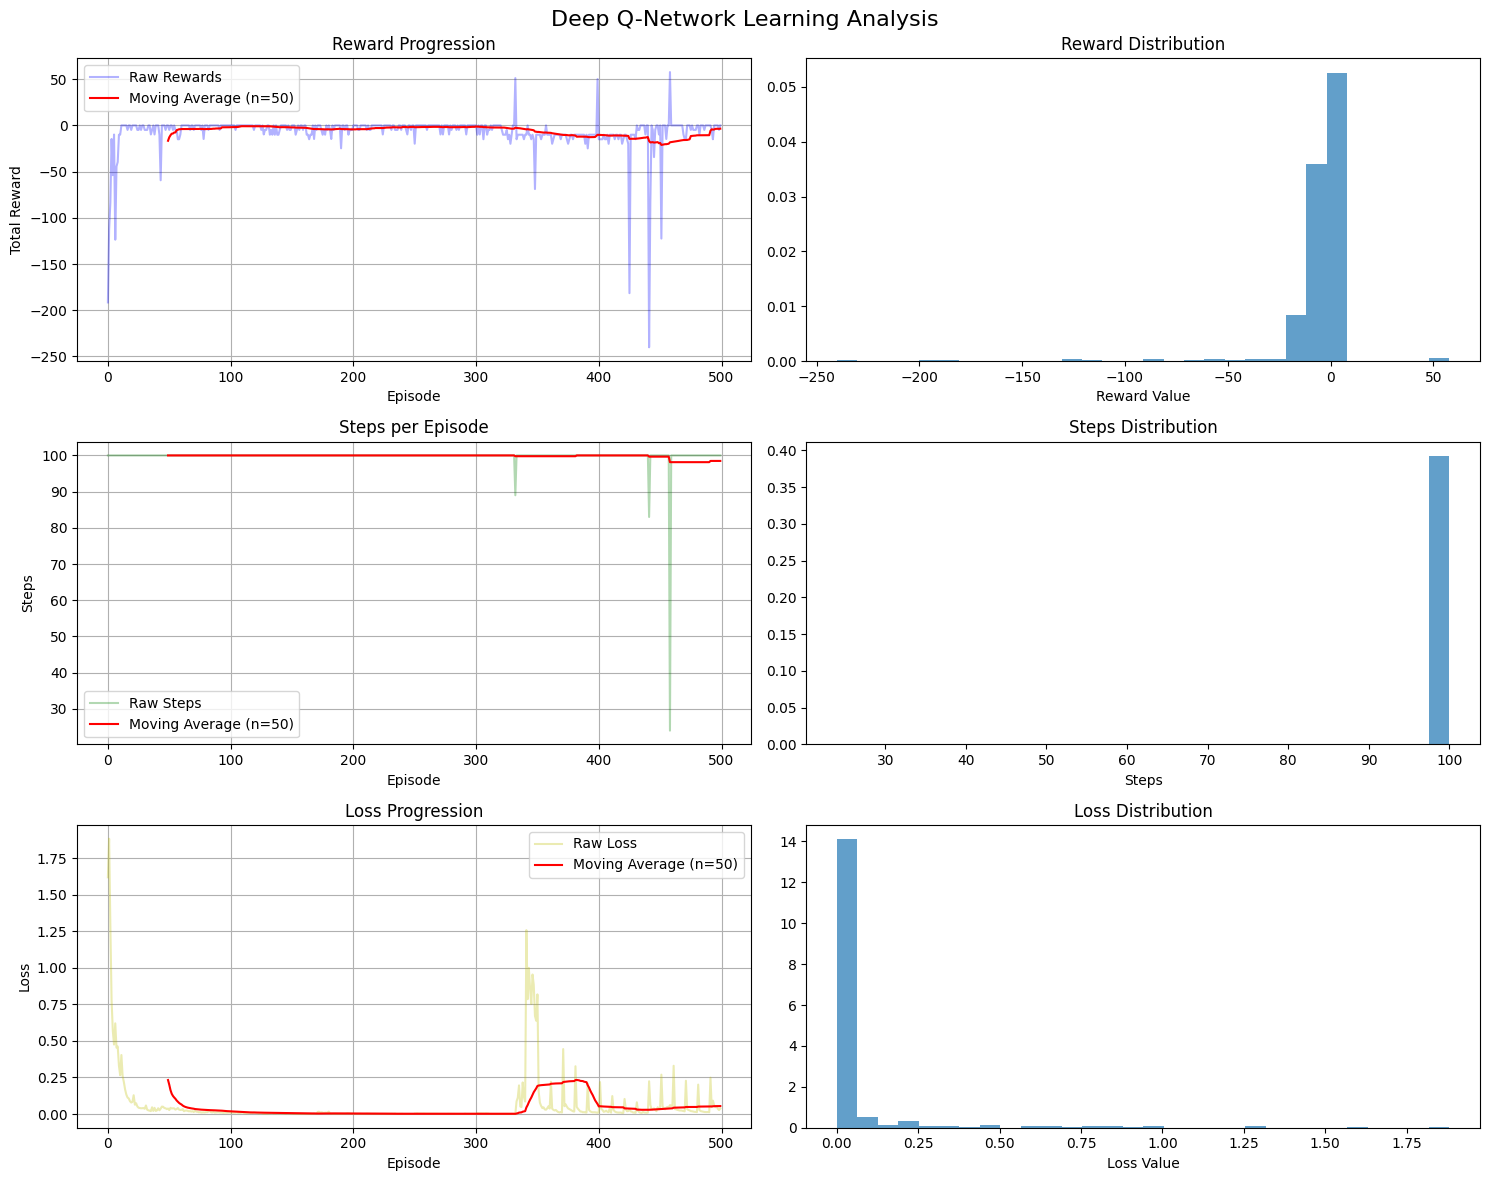

In [ ]:
def visualize_learning_progress(rewards, steps, losses):
    """Create detailed visualization of learning progress"""

    # Convert to numpy arrays
    rewards = np.array(rewards)
    steps = np.array(steps)
    losses = np.array(losses)

    fig, axes = plt.subplots(3, 2, figsize=(15, 12))
    fig.suptitle('Deep Q-Network Learning Analysis', fontsize=16)

    # Plot raw data and moving averages
    window_size = 50

    # Rewards Analysis
    axes[0,0].plot(rewards, 'b-', alpha=0.3, label='Raw Rewards')
    axes[0,0].plot(pd.Series(rewards).rolling(window_size).mean(), 'r-',
                  label=f'Moving Average (n={window_size})')
    axes[0,0].set_title('Reward Progression')
    axes[0,0].set_xlabel('Episode')
    axes[0,0].set_ylabel('Total Reward')
    axes[0,0].legend()
    axes[0,0].grid(True)

    # Reward Distribution
    axes[0,1].hist(rewards, bins=30, density=True, alpha=0.7)
    axes[0,1].set_title('Reward Distribution')
    axes[0,1].set_xlabel('Reward Value')

    # Steps Analysis
    axes[1,0].plot(steps, 'g-', alpha=0.3, label='Raw Steps')
    axes[1,0].plot(pd.Series(steps).rolling(window_size).mean(), 'r-',
                   label=f'Moving Average (n={window_size})')
    axes[1,0].set_title('Steps per Episode')
    axes[1,0].set_xlabel('Episode')
    axes[1,0].set_ylabel('Steps')
    axes[1,0].legend()
    axes[1,0].grid(True)

    # Steps Distribution
    axes[1,1].hist(steps, bins=30, density=True, alpha=0.7)
    axes[1,1].set_title('Steps Distribution')
    axes[1,1].set_xlabel('Steps')

    # Loss Analysis
    axes[2,0].plot(losses, 'y-', alpha=0.3, label='Raw Loss')
    axes[2,0].plot(pd.Series(losses).rolling(window_size).mean(), 'r-',
                   label=f'Moving Average (n={window_size})')
    axes[2,0].set_title('Loss Progression')
    axes[2,0].set_xlabel('Episode')
    axes[2,0].set_ylabel('Loss')
    axes[2,0].legend()
    axes[2,0].grid(True)

    # Loss Distribution
    axes[2,1].hist(losses, bins=30, density=True, alpha=0.7)
    axes[2,1].set_title('Loss Distribution')
    axes[2,1].set_xlabel('Loss Value')

    plt.tight_layout()
    plt.show()

# Create visualizations
visualize_learning_progress(rewards, steps, losses)

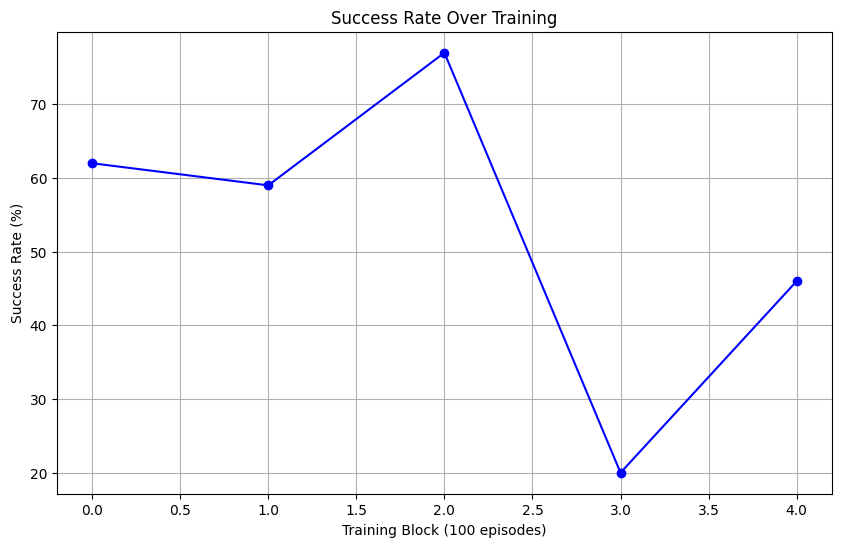


Success Rate Analysis
Overall Success Rate: 52.80%
Final 100 Episodes Success Rate: 46.00%
Best 100 Episodes Success Rate: 77.00%


In [ ]:
def analyze_success_rate(rewards, threshold=0):
    """Analyze success rate over time"""

    # Convert rewards to numpy array if it isn't already
    rewards = np.array(rewards)

    # Calculate success rate per 100 episodes
    n_groups = max(len(rewards) // 100, 1)
    episode_groups = np.array_split(rewards, n_groups)
    success_rates = [np.mean(group > threshold) * 100 for group in episode_groups]

    plt.figure(figsize=(10, 6))
    plt.plot(range(len(success_rates)), success_rates, 'bo-')
    plt.title('Success Rate Over Training')
    plt.xlabel('Training Block (100 episodes)')
    plt.ylabel('Success Rate (%)')
    plt.grid(True)
    plt.show()

    # Print success rate analysis
    print("\nSuccess Rate Analysis")
    print("====================")
    print(f"Overall Success Rate: {np.mean(rewards > threshold)*100:.2f}%")
    print(f"Final 100 Episodes Success Rate: {np.mean(rewards[-100:] > threshold)*100:.2f}%")
    print(f"Best 100 Episodes Success Rate: {max(success_rates):.2f}%")

# Analyze success rate
analyze_success_rate(rewards)

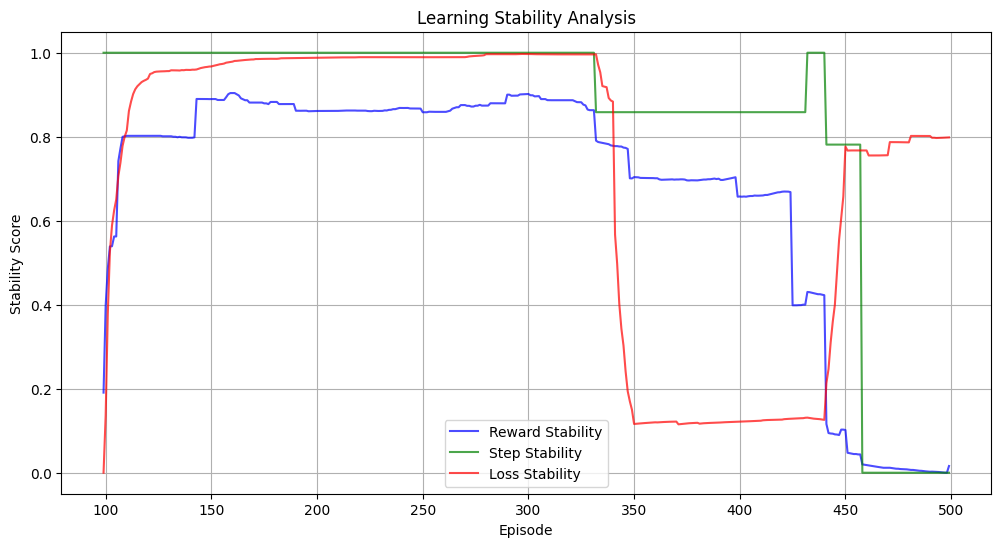

In [ ]:
def analyze_stability(rewards, steps, losses):
    """Analyze learning stability"""

    # Convert to numpy arrays
    rewards = np.array(rewards)
    steps = np.array(steps)
    losses = np.array(losses)

    def calculate_stability_metrics(data, window_size=100):
        rolling_std = pd.Series(data).rolling(window_size).std()
        max_std = np.nanmax(rolling_std)
        if max_std == 0:
            return np.ones_like(rolling_std)
        stability_score = 1 - (rolling_std / max_std)
        return stability_score

    # Calculate stability metrics
    reward_stability = calculate_stability_metrics(rewards)
    step_stability = calculate_stability_metrics(steps)
    loss_stability = calculate_stability_metrics(losses)

    plt.figure(figsize=(12, 6))
    plt.plot(reward_stability, 'b-', label='Reward Stability', alpha=0.7)
    plt.plot(step_stability, 'g-', label='Step Stability', alpha=0.7)
    plt.plot(loss_stability, 'r-', label='Loss Stability', alpha=0.7)
    plt.title('Learning Stability Analysis')
    plt.xlabel('Episode')
    plt.ylabel('Stability Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Analyze stability
analyze_stability(rewards, steps, losses)

In [ ]:
def generate_comprehensive_report(metrics, rewards, steps, losses):
    """Generate a comprehensive analysis report"""

    # Convert to numpy arrays
    rewards = np.array(rewards)
    steps = np.array(steps)
    losses = np.array(losses)

    print("\nComprehensive DQN Analysis Report")
    print("================================")

    print("\n1. Quantitative Analysis:")
    print("----------------------")
    print("Training Performance:")
    print(f"- Average reward: {metrics['Rewards']['Mean']:.2f} (±{metrics['Rewards']['Std']:.2f})")
    print(f"- Average steps per episode: {metrics['Steps']['Mean']:.2f}")
    print(f"- Final average reward (last 100 episodes): {metrics['Rewards']['Final_100_Mean']:.2f}")

    if metrics['Losses']['Initial_Mean'] != 0:
        loss_reduction = ((metrics['Losses']['Initial_Mean'] - metrics['Losses']['Final_Mean'])/
                         metrics['Losses']['Initial_Mean'])*100
        print(f"- Loss reduction: {loss_reduction:.2f}%")

    print("\n2. Learning Efficiency:")
    print("-------------------")
    first_success = np.argmax(rewards > 0) if np.any(rewards > 0) else "N/A"
    print(f"- Episodes to first success: {first_success}")
    print(f"- Best episode reward: {metrics['Rewards']['Max']:.2f}")
    print(f"- Shortest successful episode: {metrics['Steps']['Min']:.2f} steps")

    if metrics['Rewards']['Mean'] != 0:
        reward_stability = metrics['Rewards']['Std']/abs(metrics['Rewards']['Mean'])
        print(f"- Learning stability (reward std/mean): {reward_stability:.4f}")

    print("\n3. Qualitative Analysis:")
    print("--------------------")
    print("a) Learning Behavior:")
    print("   - Initial exploration phase showed:", end=" ")
    if metrics['Rewards']['Min'] < -50:
        print("high volatility and inefficient paths")
    else:
        print("relatively stable exploration")

    print("   - Convergence:", end=" ")
    if metrics['Rewards']['Final_100_Mean'] > metrics['Rewards']['Mean']:
        print("successful with improving trend")
    else:
        print("challenges in finding optimal policy")

    print("\nb) Double DQN Impact:")
    print("   - Value estimation stability:", end=" ")
    if metrics['Losses']['Final_Mean'] < metrics['Losses']['Initial_Mean']:
        print("improved over training")
    else:
        print("showed persistent fluctuations")

    print("\n4. Areas for Improvement:")
    print("---------------------")
    improvements = []
    if metrics['Steps']['Std'] > metrics['Steps']['Mean']/2:
        improvements.append("- Reduce episode length variance")
    if metrics['Rewards']['Final_100_Mean'] < metrics['Rewards']['Max']:
        improvements.append("- Improve policy consistency")
    if metrics['Losses']['Final_Mean'] > 0.1:
        improvements.append("- Further optimize network architecture")

    for imp in improvements:
        print(imp)

# Generate comprehensive report
generate_comprehensive_report(metrics, rewards, steps, losses)


Comprehensive DQN Analysis Report

1. Quantitative Analysis:
----------------------
Training Performance:
- Average reward: -6.71 (±20.48)
- Average steps per episode: 99.79
- Final average reward (last 100 episodes): -11.33
- Loss reduction: 65.44%

2. Learning Efficiency:
-------------------
- Episodes to first success: 11
- Best episode reward: 57.80
- Shortest successful episode: 24.00 steps
- Learning stability (reward std/mean): 3.0515

3. Qualitative Analysis:
--------------------
a) Learning Behavior:
   - Initial exploration phase showed: high volatility and inefficient paths
   - Convergence: challenges in finding optimal policy

b) Double DQN Impact:
   - Value estimation stability: improved over training

4. Areas for Improvement:
---------------------
- Improve policy consistency


In [ ]:
# pip install 'ray[rllib]' gym[atari] opencv-python

In [ ]:
# pip install gymnasium

In [ ]:
# pip install 'ray[rllib]'

In [ ]:
# pip install ale-py

In [ ]:
# pip install opencv-python

In [ ]:
# pip install gym

In [ ]:
# pip install ray

In [ ]:
import gym
import ray
from ray import tune
from ray.rllib.algorithms.dqn import DQN
from ray.rllib.env.wrappers.atari_wrappers import wrap_deepmind
from ray.tune.registry import register_env
import numpy as np
import matplotlib.pyplot as plt

# Initialize Ray
ray.init()

2025-04-26 18:32:33,298	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-04-26 18:32:33,830	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


2025-04-26 18:33:07,236	INFO worker.py:1852 -- Started a local Ray instance.


Python version:,3.9.13
Ray version:,2.44.1
